Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
import pandas as pd

In [3]:
col_names = []
for col in iris.feature_names:
    col = col.replace(' ', '_')
    col_names.append(col[:-5])
    
df = pd.DataFrame(iris.data, columns=col_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [4]:
df_small = df[['sepal_length', 'sepal_width']]
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Разделите данные на выборку для обучения и тестирования

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, variety, random_state=526)

Постройте модель LDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
lda.predict(X_test)

array([1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0])

Визуализируйте предсказания для тестовой выборки и центры классов

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
means = lda.means_
means

array([[4.96571429, 3.40857143, 1.46      , 0.25428571],
       [6.01944444, 2.79444444, 4.31111111, 1.33888889],
       [6.60243902, 2.99268293, 5.52926829, 2.01707317]])

In [13]:
means[:,0]

array([4.96571429, 6.01944444, 6.60243902])

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(X_test))

0.9473684210526315

In [15]:
small_train = X_train[["sepal_width", "sepal_length"]]
small_test = X_test[["sepal_width", "sepal_length"]]

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

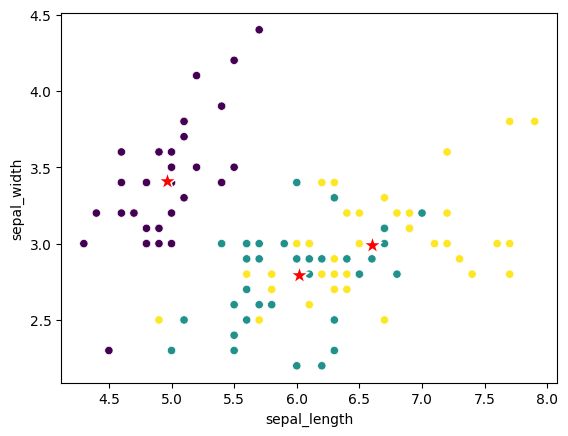

In [16]:
sns.scatterplot(x=small_train["sepal_length"], y=small_train["sepal_width"], c=y_train, legend="full")
sns.scatterplot(x=means[:,0], y=means[:,1], c="r", s=200, marker="*")

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [17]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
lda_small.means_

array([[3.40857143, 4.96571429],
       [2.79444444, 6.01944444],
       [2.99268293, 6.60243902]])

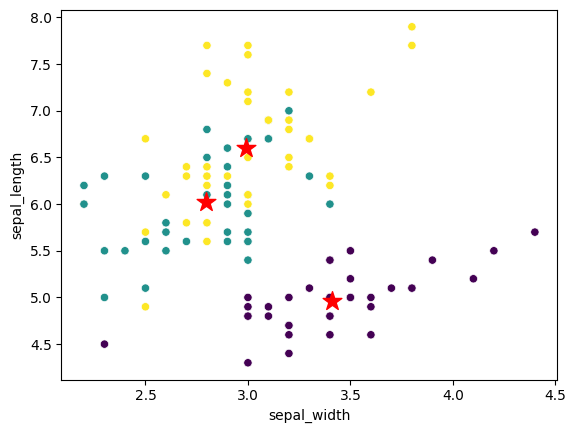

In [19]:
sns.scatterplot(x=small_train["sepal_width"], y=small_train["sepal_length"], c=y_train, legend="full")
plt.scatter(lda_small.means_[:,0], lda_small.means_[:,1], c="r", s=200, marker="*")

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
scaler = StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X_train)

In [23]:
k_inertia = []
ks = range(1,20)
for k in ks:
    clf_means = KMeans(n_clusters=k)
    clf_means.fit(X_scaled)
    k_inertia.append(clf_means.inertia_)

C:\Users\baakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\baakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\baakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

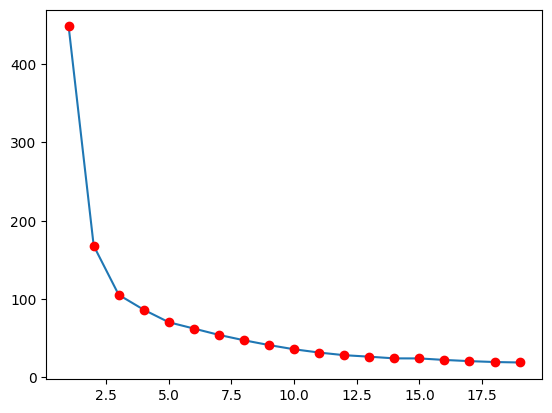

In [25]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, "ro")

После трех не происходит сильных изменений

In [26]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\baakh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


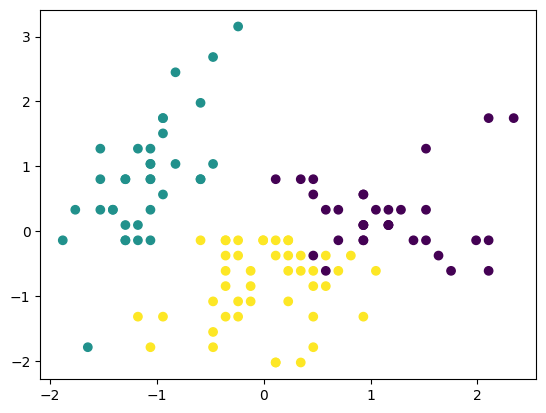

In [27]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters)